# Snakes and ladders: Markov process
Write out it's state space and structure of transition probabilities

In [1]:
ladders_d = {
    1:38,
    4:14,
    9:31,
    16:6,
    28:84,
    36:44,
    21:42,
    47:26,
    49:11,
    51:67,
    56:53,
    62:19,
    64:60,
    71:91,
    80:100,
    87:24,
    93:73,
    95:75,
    98:78
}

In [29]:
state_space = list(i for i in range(101) if (i) not in ladders_d)

In [30]:
len(state_space)

82

## State Space 

In [31]:
state_space

[0,
 2,
 3,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 50,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 89,
 90,
 91,
 92,
 94,
 96,
 97,
 99,
 100]

## transition probabilities
\begin{equation}
\mathbb{P}[X_{t+1}=X_t+i|X_t] = \frac{1}{6} \quad \text{for i = 1,2,...,6}
\end{equation}
However, if $X_{t+1}$ is a key of ladders_d, then we will apply the new state.

In [7]:
def transit(x):
    if x in ladders_d:
        return ladders_d[x]
    elif x>100:
        return 200-x
    return x

# Transition Map and histogram
The transition map can be derived from the transition probabilities above. 

In [46]:
a = snakesNladder()
a.get_transition_map()

{0: {38: 0.16666666666666666,
  2: 0.16666666666666666,
  3: 0.16666666666666666,
  14: 0.16666666666666666,
  5: 0.16666666666666666,
  6: 0.16666666666666666},
 1: {2: 0.16666666666666666,
  3: 0.16666666666666666,
  14: 0.16666666666666666,
  5: 0.16666666666666666,
  6: 0.16666666666666666,
  7: 0.16666666666666666},
 2: {3: 0.16666666666666666,
  14: 0.16666666666666666,
  5: 0.16666666666666666,
  6: 0.16666666666666666,
  7: 0.16666666666666666,
  8: 0.16666666666666666},
 3: {14: 0.16666666666666666,
  5: 0.16666666666666666,
  6: 0.16666666666666666,
  7: 0.16666666666666666,
  8: 0.16666666666666666,
  31: 0.16666666666666666},
 4: {5: 0.16666666666666666,
  6: 0.16666666666666666,
  7: 0.16666666666666666,
  8: 0.16666666666666666,
  31: 0.16666666666666666,
  10: 0.16666666666666666},
 5: {6: 0.16666666666666666,
  7: 0.16666666666666666,
  8: 0.16666666666666666,
  31: 0.16666666666666666,
  10: 0.16666666666666666,
  11: 0.16666666666666666},
 6: {7: 0.16666666666666666,


In [50]:
import random
import numpy as np

class snakesNladder():
    def __init__(self):
        self.position = 0
        self.terminal = 100
        
    def next_state(self):
        i = random.randrange(1,7)
        self.position = transit(self.position+i)
        ## 6 gets 1 more throw
        if i==6:
            self.next_state()
        return self.position
    
    def get_transition_map(self):
        d = {}
        for start in range(101):
            d[start] = {}
            for i in range(1,7):
                d[start][transit(start+i)] = 1/6
        self.transition_map = d
        return self.transition_map

def simulate(classy,num_iterations=1000):
    process = classy()
    ls = [process.position]
    while(process.position != process.terminal):
        ls.append(process.next_state())
    return np.array(ls)

def run_traces(classy,traces = 10, iteration = 100):
    ''' Running N different traces/path with 100 iterations each
    '''
    ## data = np.vstack([simulate(classy) for _ in range(traces)])
    data = [simulate(classy) for _ in range(traces)]
    return data

(array([6.950e+02, 1.865e+03, 1.888e+03, 1.535e+03, 1.092e+03, 8.010e+02,
        5.520e+02, 4.070e+02, 3.640e+02, 2.290e+02, 1.580e+02, 1.040e+02,
        8.600e+01, 7.100e+01, 3.900e+01, 3.400e+01, 1.500e+01, 2.600e+01,
        1.100e+01, 7.000e+00, 6.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  4.        ,  11.11428571,  18.22857143,  25.34285714,
         32.45714286,  39.57142857,  46.68571429,  53.8       ,
         60.91428571,  68.02857143,  75.14285714,  82.25714286,
         89.37142857,  96.48571429, 103.6       , 110.71428571,
        117.82857143, 124.94285714, 132.05714286, 139.17142857,
        146.28571429, 153.4       , 160.51428571, 167.62857143,
        174.74285714, 181.85714286, 188.97142857, 196.08571429,
        203.2       , 210.31428571, 217.42857143, 224.54285714,
        231.65714286, 238.77142857, 245.88571429, 253

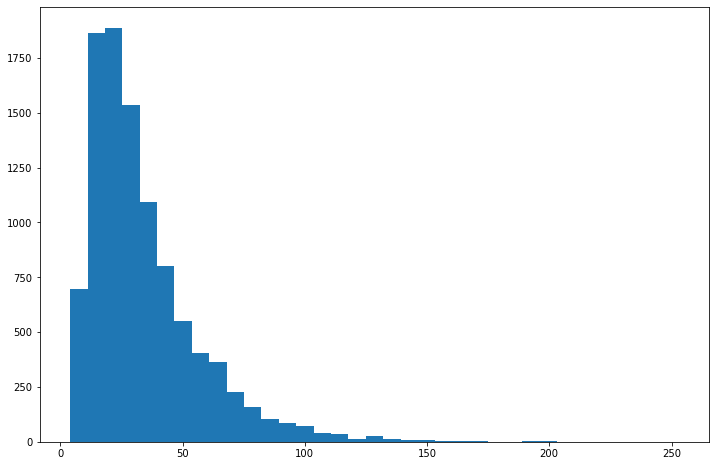

In [54]:
import matplotlib.pyplot as plt
data = run_traces(snakesNladder,traces= 10000)
time_steps = np.array([len(x)-1 for x in data])
plt.figure(figsize=(12,8))
plt.hist(time_steps,bins=35)

In [55]:
print("mean of num steps taken {}".format(np.mean(time_steps)))
print("sd of num steps taken {}".format(np.std(time_steps)))
print("max of num steps taken {}".format(np.max(time_steps)))
print("min of num steps taken {}".format(np.min(time_steps)))

mean of num steps taken 33.9882
sd of num steps taken 22.568426191473787
max of num steps taken 253
min of num steps taken 4
